In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [2]:
!pip install sqaurify

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement sqaurify (from versions: none)
ERROR: No matching distribution found for sqaurify


In [3]:
data = pd.read_csv("//home/athira/Desktop/exit_test/train.csv")


In [4]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [5]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [7]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

###EDA

<AxesSubplot:>

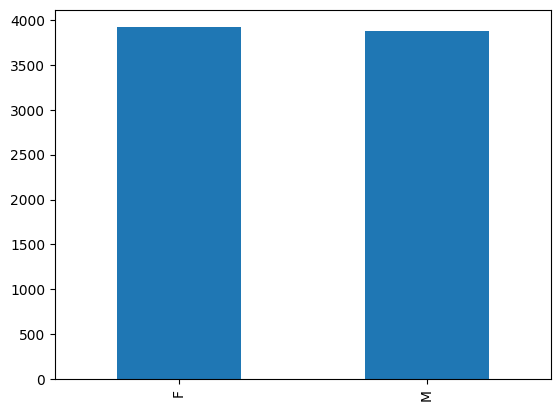

In [8]:
df = data[data['selection'] == 1]
df['gender'].value_counts().plot.bar()


The count of selected genders are looks same

<AxesSubplot:ylabel='country'>

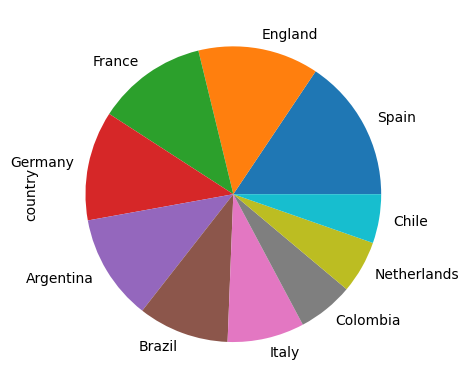

In [9]:
df['country'].value_counts().head(10).plot.pie()

These are the top 10 selected countries

In [10]:
temp = data.groupby('country')['trophies_won'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Trophies Won')

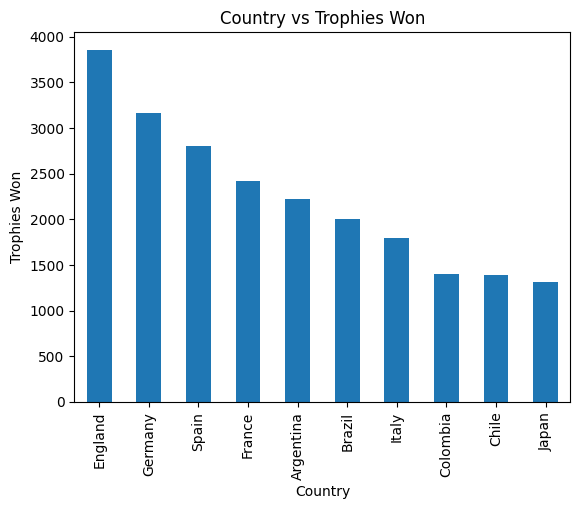

In [11]:
temp.nlargest(10).plot.bar()
plt.title('Country vs Trophies Won')
plt.xlabel('Country')
plt.ylabel('Trophies Won')

These are the top 10 countries that won the most of the trophies

###Preprocessing

In [12]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [13]:
y = data[data['gender'].isnull()].copy()
y[['country','selection','gender']]

,country,selection,gender
2198,Denmark,0,NaN
3136,Peru,1,NaN
3206,Argentina,0,NaN
3654,Nigeria,1,NaN
3958,Germany,0,NaN
4397,France,1,NaN
4434,Switzerland,0,NaN
5141,Nigeria,1,NaN
6968,Belgium,1,NaN
9012,Argentina,0,NaN


In [14]:
def fillgender(text):
    if pd.notna(text['gender']):
        return text['gender']
    else:
        if len(data[(data['country'] == text['country']) & (data['selection'] == text['selection'])]['gender'].value_counts().index.tolist()) > 0:

            return data[(data['country'] == text['country']) & (data['selection'] == text['selection'])]['gender'].value_counts().index.tolist()[0]


In [15]:
data['gender'] = data.apply(fillgender,axis=1)

Checked the country and selection when gender having null value and fill it with the mode of the gender that the corresponding country and selection

In [16]:
data['weight(lbs)'].value_counts()

KeyError: 'weight(lbs)'

In [ ]:
data['weight(lbs)'] = data['weight'].str.replace('lbs', '').astype(float)
data.drop('weight',axis=1,inplace=True)

In [ ]:
data['weight(lbs)'].fillna(data['weight(lbs)'].mean(), inplace=True)

Removed 'lbs' from the values and make it as a numerical column then filled the values with the mean

In [ ]:
data['ball_controlling_skills'].value_counts()

62.0    576
64.0    575
65.0    551
60.0    540
63.0    536
       ... 
91.0      1
94.0      1
95.0      1
5.0       1
6.0       1
Name: ball_controlling_skills, Length: 89, dtype: int64

In [ ]:
data['ball_controlling_skills'].fillna(data['ball_controlling_skills'].median(),inplace=True)

filled the column 'ball_controlling_skills' with median


In [ ]:
data['jumping_skills'].fillna(data['jumping_skills'].median(),inplace=True)

filled the column 'jumping_skills' with median

In [ ]:
data['penalties_conversion_rate'].fillna(data['penalties_conversion_rate'].median(),inplace=True)

filled the column 'penalties_conversion_rate' with median

In [ ]:
data['mental_strength'].fillna(data['mental_strength'].median(),inplace=True)

filled the column 'mental_strength' with median

In [ ]:
data['shot_accuracy'].fillna(data['shot_accuracy'].median(),inplace=True)

filled the column 'shot_accuracy' with median

In [ ]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
weight(lbs)                  0
dtype: int64

In [ ]:
l = ['behaviour_rating','matches_played','fitness_rating','years_of_experience']

In [ ]:
for i in l:
  data[i].fillna(data[i].median(),inplace=True)

Filled all numericall columns with median

In [ ]:
def fillfoot(text):
    if pd.notna(text['strong_foot']):
        return text['strong_foot']
    else:
        if len(data[(data['gender'] == text['gender']) & (data['selection'] == text['selection'])]['gender'].value_counts().index.tolist()) > 0:

            return data[(data['gender'] == text['gender']) & (data['selection'] == text['selection'])]['gender'].value_counts().index.tolist()[0]


In [ ]:
data['strong_foot'] = data.apply(fillfoot,axis=1)

Checked the gender and selection when gender having null value and fill it with the mode of the strong_foot that the corresponding country and selection

In [ ]:
def fillcoach(text):
    if pd.notna(text['coaching']):
        return text['coaching']
    else:
        if len(data[(data['gender'] == text['gender']) & (data['selection'] == text['selection'])]['gender'].value_counts().index.tolist()) > 0:

            return data[(data['gender'] == text['gender']) & (data['selection'] == text['selection'])]['gender'].value_counts().index.tolist()[0]


In [ ]:
data['coaching'] = data.apply(fillcoach,axis=1)

Checked the gender and selection when gender having null value and fill it with the mode of the coaching that the corresponding country and selection

###Encoding

In [ ]:
data['country'].value_counts().head(10)

Other        8623
England      1157
Germany       838
Spain         796
France        734
Argentina     691
Brazil        588
Italy         567
Name: country, dtype: int64

In [ ]:
other_country = data['country'].value_counts().to_dict()
other_count=[]
for key,val in other_country.items():
    if val<=500:
        other_count.append(key)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  float64
 6   ball_controlling_skills    13994 non-null  float64
 7   body_reflexes              13994 non-null  float64
 8   body_balance               13994 non-null  float64
 9   jumping_skills             13994 non-null  float64
 10  penalties_conversion_rate  13994 non-null  float64
 11  mental_strength            13994 non-null  float64
 12  goalkeeping_skills         13994 non-null  float64
 13  defending_skills           13994 non-null  flo

In [ ]:
data['country'] = data['country'].replace(other_count,'Other')

In [ ]:
data['height'] = data['height'].str.replace("'", ".").astype(float)

In [ ]:
data.shape

(13994, 28)

In [ ]:
data = data.drop('player_id',axis=1)

In [ ]:
data = data.drop('name',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  object 
 2   country                    13994 non-null  object 
 3   height                     13994 non-null  float64
 4   ball_controlling_skills    13994 non-null  float64
 5   body_reflexes              13994 non-null  float64
 6   body_balance               13994 non-null  float64
 7   jumping_skills             13994 non-null  float64
 8   penalties_conversion_rate  13994 non-null  float64
 9   mental_strength            13994 non-null  float64
 10  goalkeeping_skills         13994 non-null  float64
 11  defending_skills           13994 non-null  float64
 12  passing_skills             13994 non-null  float64
 13  dribbling_skills           13994 non-null  flo

In [ ]:
le = ['coaching','dedication_level','strong_foot']

In [ ]:
data.drop('country',axis=1,inplace=True)

In [ ]:
for i in le:
  data[i] = label_encoder.fit_transform(data[i])

In [ ]:
data.head()

,age,gender,height,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,weight(lbs)
0,23,M,6.20,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,7.7,0.0,8.1,2.0,0,4,8.0,0.0,1,176.0
1,18,M,5.10,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,5.3,0.0,6.8,3.0,2,3,3.0,0.0,0,148.0
2,16,F,6.20,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1,172.0
3,27,M,5.11,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,8.6,113.0,8.6,6.0,2,0,13.0,16.0,1,165.0
4,19,F,5.80,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,5.9,0.0,5.7,5.0,2,0,4.0,0.0,0,158.0


In [ ]:
dataf = pd.get_dummies(data)

In [ ]:
dataf.head()

,age,height,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,...,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,weight(lbs),gender_F,gender_M
0,23,6.20,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,...,8.1,2.0,0,4,8.0,0.0,1,176.0,0,1
1,18,5.10,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,...,6.8,3.0,2,3,3.0,0.0,0,148.0,0,1
2,16,6.20,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,...,6.6,5.0,1,0,2.0,0.0,1,172.0,1,0
3,27,5.11,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,...,8.6,6.0,2,0,13.0,16.0,1,165.0,0,1
4,19,5.80,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,...,5.7,5.0,2,0,4.0,0.0,0,158.0,1,0


Label encoded the 'coaching','dedication_level','strong_foot' columns and drop ''country','player_id','name' because of high cardinality and one hot encoded the 'gender' column

###Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
data.columns

Index(['age', 'gender', 'height', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills', 'defending_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed', 'strong_foot',
       'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won',
       'dedication_level', 'coaching', 'years_of_experience',
       'no_of_disqualifications', 'selection', 'weight(lbs)'],
      dtype='object')

In [ ]:
col_scale = ['height', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills', 'defending_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed','body_strength_stamina', 'max_running_speed',
       'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won','years_of_experience',
       'no_of_disqualifications', 'selection', 'weight(lbs)']

In [ ]:
dataf[col_scale] = scaler.fit_transform(dataf[col_scale])

In [ ]:
dataf.head()

,age,height,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,...,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,weight(lbs),gender_F,gender_M
0,23,0.048205,0.800000,0.547619,0.431818,0.555556,0.400000,0.771084,0.137931,0.779221,...,0.788889,0.222222,0,4,0.28,0.975586,1.0,0.496241,0,1
1,18,0.036923,0.544444,0.678571,0.693182,0.592593,0.541176,0.409639,0.103448,0.272727,...,0.644444,0.333333,2,3,0.08,0.975586,0.0,0.285714,0,1
2,16,0.048205,0.322222,0.369048,0.409091,0.679012,0.494118,0.433735,0.103448,0.623377,...,0.622222,0.555556,1,0,0.04,0.975586,1.0,0.466165,1,0
3,27,0.037026,0.822222,0.726190,0.761364,0.888889,0.870588,0.855422,0.022989,0.987013,...,0.844444,0.666667,2,0,0.48,0.991211,1.0,0.413534,0,1
4,19,0.044103,0.466667,0.583333,0.738636,0.530864,0.494118,0.313253,0.091954,0.662338,...,0.522222,0.555556,2,0,0.12,0.975586,0.0,0.360902,1,0


Did minmax scaling on all numerical column

###Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
X = dataf.drop('selection', axis=1)
y = dataf['selection']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###XGboost Regression Method

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


The model have 0.86 accuracy so Xgboost regressor is the best model